In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, '../../aaai18/code/')
from common import *

In [14]:
pred_all = pickle.load(open('./pred_all.pkl', 'r'))
pred_sub_all = pickle.load(open('./pred_sub_all.pkl', 'r'))
pred_sub_agg = pickle.load(open('./pred_sub_agg.pkl', 'r'))
pred_sub_inter = pickle.load(open('./pred_sub_inter.pkl', 'r'))

In [15]:
out_all = pickle.load(open('./out_all.pkl', 'r'))
out_sub_all = pickle.load(open('./out_sub_all.pkl', 'r'))
out_sub_agg = pickle.load(open('./out_sub_agg.pkl', 'r'))
out_sub_inter = pickle.load(open('./out_sub_inter.pkl', 'r'))

In [16]:
mean_out_all = pd.Panel(out_all).mean(axis=0)
mean_out_sub_all = pd.Panel(out_sub_all).mean(axis=0)
mean_out_sub_agg = pd.Panel(out_sub_agg).mean(axis=0)
mean_out_sub_inter = pd.Panel(out_sub_inter).mean(axis=0)

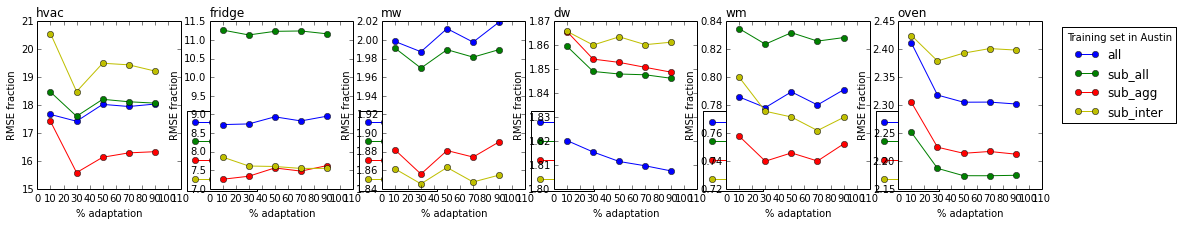

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(3,18))
ax = axes.flatten()
count = 0
APPLIANCES_ORDER = ['aggregate', 'hvac', 'fridge', 'mw', 'dw', 'wm', 'oven']

for appliance in APPLIANCES_ORDER[1:]:
#     print appliance
#     df1 = all_out[appliance + "_all"]
#     df2 = all_out[appliance + "_sub_all"]
#     df3 = all_out[appliance + "_sub_agg"]
    


    df = pd.concat([mean_out_all[appliance], mean_out_sub_all[appliance], mean_out_sub_agg[appliance], mean_out_sub_inter[appliance]], axis=1)
    pd.DataFrame(df).plot(ax=ax[count],  figsize=(18, 3), marker='o', xlim=(0, 110), color=['b', 'g', 'r', 'y'])
    legend = ax[count].legend(loc='best', bbox_to_anchor=(1.0, 0.5))
#     legend.remove()

#     major_ticks = np.arange(0, 101, 20)   

    ax[count].set_xlabel("% adaptation");
    ax[count].locator_params(tight=False, nbins=20, axis='x')
    ax[count].set_ylabel('RMSE fraction')
    ax[count].set_title(appliance, loc="left")
#     ax
    count += 1
plt.legend(['all', 'sub_all', 'sub_agg', 'sub_inter'], loc='best', bbox_to_anchor=(1.1, 1), title='Training set in Austin')
# plt.savefig("appliance_comparison.pdf", format='pdf')

          dw    fridge       hvac        mw      oven        wm
10  0.054118  2.739254   9.801759  0.084376  0.091787  0.016656
30  0.053976  2.744887   9.666425  0.083906  0.088240  0.016495
50  0.053858  2.804752  10.002118  0.084957  0.087751  0.016734
70  0.053805  2.770183   9.959759  0.084344  0.087759  0.016535
90  0.053740  2.810304  10.007777  0.085258  0.087630  0.016765


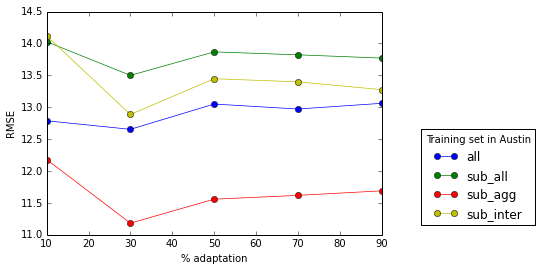

In [18]:
fig, ax = plt.subplots()
error = (pd.DataFrame(mean_out_all)*pd.Series(contri['SanDiego'])).sum(axis=1)
print pd.DataFrame(mean_out_all)*pd.Series(contri['SanDiego'])
error.plot(label='all', marker='o', ax=ax, linewidth=0.7,  color=['b'])
# error.plot(marker='.',ax=ax, legend=False, linewidth=0.6)

error = (pd.DataFrame(mean_out_sub_all)*pd.Series(contri['SanDiego'])).sum(axis=1)
error.plot(label='sub_all',marker='o', ax=ax, linewidth=0.7, color=['g'])
# error.plot(marker='.',ax=ax, legend=False, linewidth=0.6)

error = (pd.DataFrame(mean_out_sub_agg)*pd.Series(contri['SanDiego'])).sum(axis=1)
error.plot(label='sub_agg',marker='o', ax=ax, linewidth=0.7, color=['r'])

error = (pd.DataFrame(mean_out_sub_inter)*pd.Series(contri['SanDiego'])).sum(axis=1)
error.plot(label='sub_inter',marker='o', ax=ax, linewidth=0.7, color=['y'])

plt.ylabel("RMSE")
plt.xlabel("% adaptation")
plt.legend(['all', 'sub_all', 'sub_agg', 'sub_inter'], loc='best', bbox_to_anchor=(1.1, 0.5), title='Training set in Austin')
# plt.savefig("overall_comparison.pdf", format='pdf')

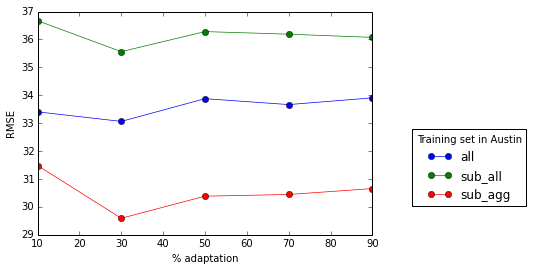

In [13]:
fig, ax = plt.subplots()
error = (pd.DataFrame(mean_out_all)).sum(axis=1)
# print pd.DataFrame(mean_out_all))
error.plot(label='all', marker='o', ax=ax, linewidth=0.7,  color=['b'])
# error.plot(marker='.',ax=ax, legend=False, linewidth=0.6)

error = (pd.DataFrame(mean_out_sub_all)).sum(axis=1)
error.plot(label='sub_all',marker='o', ax=ax, linewidth=0.7, color=['g'])
# error.plot(marker='.',ax=ax, legend=False, linewidth=0.6)

error = (pd.DataFrame(mean_out_sub_agg)).sum(axis=1)
error.plot(label='sub_agg',marker='o', ax=ax, linewidth=0.7, color=['r'])

plt.ylabel("RMSE")
plt.xlabel("% adaptation")
plt.legend(['all', 'sub_all', 'sub_agg'], loc='best', bbox_to_anchor=(1.1, 0.5), title='Training set in Austin')
# plt.savefig("overall_comparison.pdf", format='pdf')